#  **AIML Capstone Project 2022: ====> Group 2 Computer Vision 1**

# **Pneumonia Detection Challenge**


## What is Pneumonia?

**Pneumonia** is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli.

The alveoli fill with fluid or pus, making it difficult to breathe.Pneumonia is a lung infection that can range from mild to so severe that you have to go to the hospital.
![](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/05/18/13/02/ww5r032t-8col-jpg.jpg)

Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or post-radiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis.

CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.

## Pneumonia Detection

Now to detect Pneumonia, we need to detect **Inflammation** of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

## How Is Pneumonia Diagnosed?
Sometimes pneumonia can be difficult to diagnose because the symptoms are so variable, and are often very similar to those seen in a cold or influenza. To diagnose pneumonia, and to try to identify the germ that is causing the illness, your doctor will ask questions about your medical history, do a physical exam, and run some tests.

### Medical history
Your doctor will ask you questions about your signs and symptoms, and how and when they began. To help figure out if your infection is caused by bacteria, viruses or fungi, you may be asked some questions about possible exposures, such as:

### Physical exam
Your doctor will listen to your lungs with a stethoscope. If you have pneumonia, your lungs may make crackling, bubbling, and rumbling sounds when you inhale.

### Diagnostic Tests
If your doctor suspects you may have pneumonia, they will probably recommend some tests to confirm the diagnosis and learn more about your infection. These may include:

1 Blood tests to confirm the infection and to try to identify the germ that is causing your illness.

2) Chest X-ray to look for the location and extent of inflammation in your lungs.

3) Pulse oximetry to measure the oxygen level in your blood. Pneumonia can prevent your lungs from moving enough oxygen into your bloodstream.

4) Sputum test on a sample of mucus (sputum) taken after a deep cough, to look for the source of the infection. If you are considered a high-risk patient because of your age and overall health, or if you are hospitalized, the doctors may want to do some additional tests, including:

5) CT scan of the chest to get a better view of the lungs and look for abscesses or other complications.

6) Arterial blood gas test, to measure the amount of oxygen in a blood sample taken from an artery, usually in      your wrist. This is more accurate than the simpler pulse oximetry.

7) Pleural fluid culture, which removes a small amount of fluid from around tissues that surround the lung, to      analyze and identify bacteria causing the pneumonia.

8) Bronchoscopy, a procedure used to look into the lungs' airways. If you are hospitalized and your treatment is    not working well, doctors may want to see whether something else is affecting your airways, such as a            blockage. They may also take fluid samples or a biopsy of lung tissue.


## Business Domain Value

Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. 

Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology).

Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

## Image DataType

Medical images are stored in a special format called DICOM files (`*.dcm`). They contain a combination of header metadata as well as underlying raw image arrays for pixel data.

Dataset link: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data


## Prediction Output

In this project, we have to predict whether pneumonia exists in a given image. This is done by predicting bounding boxes around areas of the lung. Samples without bounding boxes are negative and contain no definitive evidence of pneumonia. Samples with bounding boxes indicate evidence of pneumonia.

When making predictions, the model should predict as many bounding boxes as necessary, in the format: `confidence x-min y-min width height`

There will be only ONE predicted row per image. This row may include multiple bounding boxes.

A properly formatted row may look like any of the following.

For patientIds with no predicted pneumonia / bounding boxes: `0004cfab-14fd-4e49-80ba-63a80b6bddd6,`

For patientIds with a single predicted bounding box: `0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.5 0 0 100 100`

For patientIds with multiple predicted bounding boxes: `0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.5 0 0 100 100 0.5 0 0 100 100,` etc.

The general format is as follows:

`patientId,{confidence x-min y-min width height},{confidence x-min y-min width height}, etc.`

## Dataset File Description

`stage_2_train_labels.csv` - the training set. Contains `patientId`s and bounding box / target information.

`stage_2_detailed_class_info.csv` - provides detailed information about the type of positive or negative class for each image.

## Data Fields

- `patientId_` - Each patientId corresponds to a unique image.
- `x_` - the upper-left x coordinate of the bounding box.
- `y_` - the upper-left y coordinate of the bounding box.
- `width_` - the width of the bounding box.
- `height_` - the height of the bounding box.
- `Target_` - the binary Target, indicating whether this sample has evidence of pneumonia.


## Lung Opacity

Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb X-rays and appear white in the image.

While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia related.

In the data, some of these are labeled “Not Normal No Lung Opacity”.This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and often times this finding may mimic the appearance of true pneumonia.

It's important to note that the various shades of gray in the chest X-Ray refer to the following:

- **Black** = Air
- **White** = Bone
- **Grey** = Tissue or Fluid

In a normal image (shown above) we see the lungs as black, but they have different projections on them - mainly the rib cage bones, main airways, blood vessels and the heart.

In case of pneumonia, a **haziness** (also referred to as **consolidation**) is present in the chest x-ray image. 

Images with no lung opacity and no pneumonia are images where the patient can have rounded hazy boundaries or masses (probably because of lung nodules or masses which can be because of cancer).

There are other exceptional cases as well where there can be no lung opacity but no pneumonia either. Some of these cases include **pneumonectomy** (lung removed by surgery), **enlarged heart**, **pleural effusion**, etc. 

**Reference**: https://www.kaggle.com/zahaviguy/what-are-lung-opacities

In [ ]:
#Mounting Google CoLab
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
!pip install pydicom
!pip install mrcnn
import pydicom as pyd
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import os
from matplotlib.patches import Rectangle
from mrcnn.config import Config
from collections import defaultdict
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import tensorflow as tf
%matplotlib inline
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

import skimage
from skimage.transform import resize
from skimage import feature, filters
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import random
import pickle
from sklearn.metrics import roc_curve,auc,precision_recall_curve,classification_report

     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 51 kB 259 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54932 sha256=c93a41d34cc58760cd9bcc8cdddd67a515f95095b74ce437354a03816dcaf778
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [ ]:
Unzip the "rsna-pneumonia-detection-challenge.zip" file

from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Colab Notebooks/Capstone Project/rsna-pneumonia-detection-challenge.zip', 'r') as z:
  z.extractall()

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/Capstone Project'

'Capstone Project Pneumonia Detection Ronald.ipynb'
'GCP Credits Request Link - RSNA.txt'
 Pneumonia_Detection.ipynb
'Pneumonia Detection Ronald.ipynb'
'Pneumonia Detection with PPTs'
 pneumonia_status
 stage_2_detailed_class_info.csv
 stage_2_sample_submission.csv
 stage_2_test_images
 stage_2_train_images
 stage_2_train_labels.csv


### **Pre-Processing, Data Visualization, EDA**

In [ ]:
#Setting the project path
project_path =  '/content/drive/MyDrive/Colab Notebooks/Capstone Project/'
os.chdir(project_path)

In [ ]:
#Checking file format (.dcm) in the train images folder

for file in os.listdir((os.path.join(project_path,'stage_2_train_images'))):
  if not file.endswith('.dcm'):
    print(file)

In [ ]:
#Checking file format (.dcm) in the test images folder

for file in os.listdir((os.path.join(project_path,'stage_2_test_images'))):
  if not file.endswith('.dcm'):
    print(file)

In [ ]:
class_info = pd.read_csv('stage_2_detailed_class_info.csv')
labels = pd.read_csv('stage_2_train_labels.csv')

print('Size of Dataset 1: ',labels.shape)
print('Size of Dataset 2: ',class_info.shape)
print('Number of Unique X-Rays in Dataset 1 : ',labels['patientId'].nunique())
print('Number of Unique X-Rays in Dataset 2 : ',class_info['patientId'].nunique())

Size of Dataset 1:  (30227, 6)
Size of Dataset 2:  (30227, 2)
Number of Unique X-Rays in Dataset 1 :  26684
Number of Unique X-Rays in Dataset 2 :  26684


In [ ]:
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [ ]:
labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
labels.drop_duplicates(inplace=True)
class_info.drop_duplicates(inplace=True)
print('Size of Dataset 1: ',labels.shape)
print('Size of Dataset 2: ',class_info.shape)
print('Number of Unique X-Rays in Dataset 1 : ',labels['patientId'].nunique())
print('Number of Unique X-Rays in Dataset 2 : ',class_info['patientId'].nunique())

Size of Dataset 1:  (30227, 6)
Size of Dataset 2:  (26684, 2)
Number of Unique X-Rays in Dataset 1 :  26684
Number of Unique X-Rays in Dataset 2 :  26684


In [ ]:
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [ ]:
labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


**Compare the labels and class information for possible join**

In [ ]:
print("Shape of the train labels:", labels.shape)
print("Shape of the detailed class information:", class_info.shape)

Shape of the train labels: (30227, 6)
Shape of the detailed class information: (26684, 2)


**Data Inference:** A join or merge should typically give us a dataset that has a shape of (30227) assuming we keep all rows and drop the redundant 'patientId' column.

**Check uniqueness of the data**

**Approach:**

There could be duplicate patientID entries, resulting to multiple bounding boxes with relative target classification/class information.
Compare if the sequence of records are synchronous between the "train labels" and "class information" datasets.
If synchronous then a simple join can be performed on the index

**Exploring Train Labels Dataset**

In [ ]:
labels_count = pd.DataFrame()
labels_count = labels['patientId'].value_counts().value_counts().reset_index()
labels_count.columns = ['Counts', 'records in train labels']
labels_count.style.hide_index()

Counts,records in train labels
1,23286
2,3266
3,119
4,13


In [ ]:
unique_labels = labels_count['records in train labels'].sum()
print("Total unique records in train labels = ", unique_labels)

Total unique records in train labels =  26684


**Inference:**

1.   There are 23,286 unique entries and 3,266 entries that have duplicates.
Furthermore, 119 patients have triplicate entries and 13 patients with quadruplicate entries.


2.   Unique entries are 26,684. This means there are 26,684 patients in the training sample. Therefore, if the data is consistent, we should have the same number of entries in the "class information" dataset and the same number of training images.



**Exploring Class Information Dataset**

In [ ]:
#check this against results

class_data = pd.DataFrame()
class_data = class_info['patientId'].value_counts().value_counts().reset_index()
class_data.columns = ['counts', 'records in class info']
class_data.style.hide_index()

counts,records in class info
1,26684


In [ ]:
unique_classes = class_data['records in class info'].sum()
print("Total unique records in class info = ", unique_classes)

Total unique records in class info =  26684


**Merging Data**

In [ ]:
combined = pd.merge(left = class_info, right = labels, how = 'left', on = 'patientId')

combined.info(show_counts = True)
combined.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   class      30227 non-null  object 
 2   x          9555 non-null   float64
 3   y          9555 non-null   float64
 4   width      9555 non-null   float64
 5   height     9555 non-null   float64
 6   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1


**Shape of Dataset**

In [ ]:
combined.shape

(30227, 7)

In [ ]:
combined['patientId'].nunique()

26684

- Existence of repeated entries. A patient might take multiple samples with varying results.



In [ ]:
combined['patientId'].value_counts()

3239951b-6211-4290-b237-3d9ad17176db    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
                                       ..
7233ab9f-7fa6-4b5b-acdc-1c93bf945db5    1
722cca4a-f542-47ba-be14-29238c1124e1    1
722ad9c3-919a-4c08-bb67-cafd603ba754    1
7228bf11-3ce7-47f5-bee3-d36325df1dc8    1
943b27f1-ba1c-415b-b738-7b52aefa445b    1
Name: patientId, Length: 26684, dtype: int64

##### **1. Class Distribution**

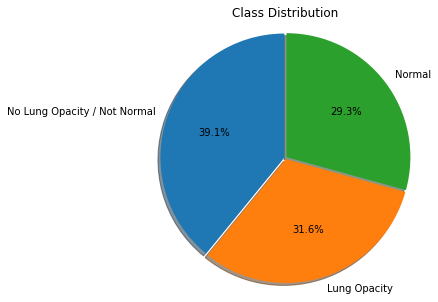

In [ ]:
labels_info=combined['class'].value_counts()
explode = (0.01,0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(labels_info.values, explode=explode, labels=labels_info.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Class Distribution')
plt.show()

In [ ]:
print('Total records with Lung Opacity: ', combined[combined['class'] == 'Lung Opacity']['class'].count())
print('Total records with No Lung Opacity / Not Normal: ', combined[combined['class'] == 'No Lung Opacity / Not Normal']['class'].count())
print('Total Normal records: ', combined[combined['class'] == 'Normal']['class'].count())

Total records with Lung Opacity:  9555
Total records with No Lung Opacity / Not Normal:  11821
Total Normal records:  8851


**Observation:**

The above graph above shows total numbers of records for the different classes.
The graph shows that patients with No Lung Opacity/ Not Normal are highest number as compared to those with Lung Opacity and who are Normal patients.

8,851 (29.3%) records does not have any desease.

9,555 (31.6%) records has Lung Opacity.

11,821 (39.1%) records hs No Lung Opacity / Not Normal.

##### **2. Target to Class**

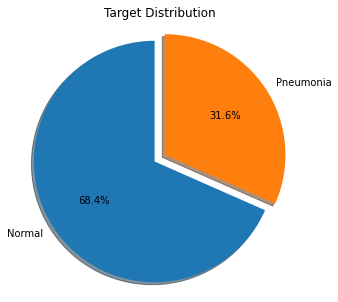

In [ ]:
#Checking the Target Distribution
labels_info=combined['Target'].value_counts()
explode = (0.1,0.0)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(labels_info.values, explode=explode, labels=['Normal','Pneumonia'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

**Observation:**

From the above graph, we can infer that 31.6% of people in the daset have got Pneumonia and 68.4% do not have Pneumonia.

#####**3. Impact of patient's age on pneumonia**

In [ ]:
#Appending data to the images

age, gender, view_posn, study_id = [], [], [], []

combined['patientAge'] = 0
combined['patientSex'] = ''
combined['ViewPosition'] = ''
combined['StudyID'] = ''
counter = 0
for value in combined['patientId']:
  counter = counter + 1
  print(counter)
  patient_Target = (pd.to_numeric(combined[combined['patientId'] == value]['Target'],downcast ='signed', errors='coerce')) < 1
  dcm_patientFile = project_path + '/stage_2_train_images/%s.dcm' % value
  dcm_patientData = pyd.read_file(dcm_patientFile)
  age.append(dcm_patientData.PatientAge)
  gender.append(dcm_patientData.PatientSex)
  view_posn.append(dcm_patientData.ViewPosition)
  study_id.append(dcm_patientData.StudyID)

combined['patientAge'] = age
combined['patientSex'] = gender
combined['ViewPosition'] = view_posn
combined['StudyID'] = study_id
   
combined.head(10)

Streaming output truncated to the last 5000 lines.
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
2

,patientId,class,x,y,width,height,Target,patientAge,patientSex,ViewPosition,StudyID
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,51,F,PA,
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,48,F,PA,
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,19,M,AP,
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0,28,M,PA,
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1,32,F,AP,
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1,32,F,AP,
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,54,M,AP,
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,78,M,PA,
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1,75,M,PA,
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1,75,M,PA,


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


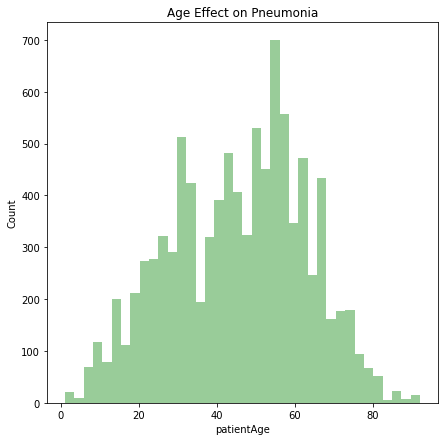

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
age_effect = sns.distplot(combined[combined['Target'] == 1]['patientAge'], hist = True, kde = False, color = 'green', label = 'Pneumonia Positive')
age_effect_count = age_effect.set_ylabel('Count')
age_effect_count = age_effect.set_title('Age Effect on Pneumonia')

**Observation:**
*   The above graph shows the relation between pneumonia and patient's age.
*   There are more numbers of pneumonia patients between ages 40 to 60.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


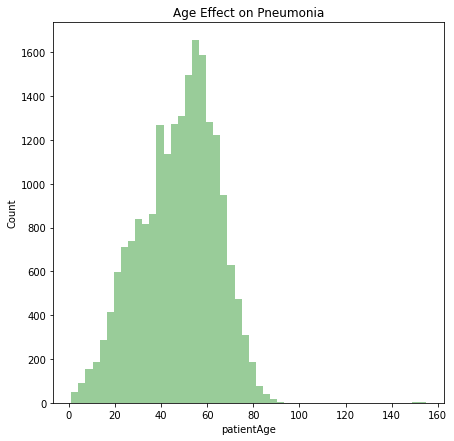

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
age_effect = sns.distplot(combined[combined['Target'] == 0]['patientAge'], hist = True, kde = False, color = 'green', label = 'Pneumonia Negative')
age_effect_count = age_effect.set_ylabel('Count')
age_effect_count = age_effect.set_title('Age Effect on Pneumonia')

**Observation:**
*   The above graph also shows the relation between pneumonia and patient's age.
*   There are more numbers of pneumonia patients between ages 40 to 60.

##### **4. Relation between patient's age and different classes**

**Normal Data Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


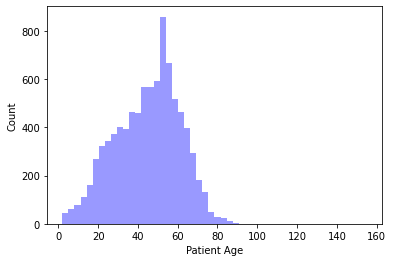

In [ ]:
neg = sns.distplot(combined[combined['class'] == 'Normal']['patientAge'], hist = True, color = 'blue', kde = False)
normal_patient = neg.set_ylabel('Count')
normal_patient = neg.set_xlabel('Patient Age')

**Observation:**

- From the above graph, ages from 40 to 60 show more numbers with normality.

**No Lung Opacity / Not Normal Data Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


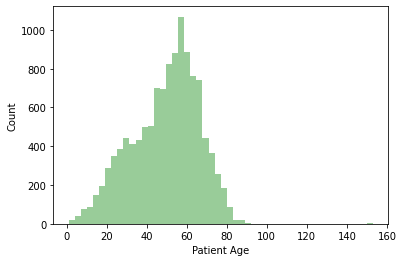

In [ ]:
abnormal_patient = sns.distplot(combined[combined['class'] == 'No Lung Opacity / Not Normal']['patientAge'], hist = True, color = 'green',kde = False)
abnormal_patient_info = abnormal_patient.set_ylabel('Count')
abnormal_patient_info = abnormal_patient.set_xlabel('Patient Age')

**Observation:**

- Above graph shows that the patient's age between 40-60 have more number of cases.

**Lung Opacity Data Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


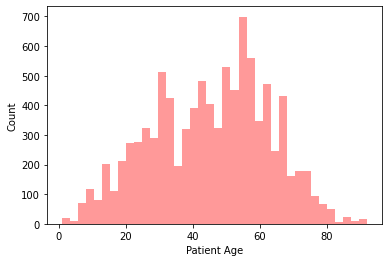

In [ ]:
opacity = sns.distplot(combined[combined['class'] == 'Lung Opacity']['patientAge'], hist=True, color = 'red',kde = False)
opacity_info = opacity.set_ylabel('Count')
opacity_info = opacity.set_xlabel('Patient Age')

**Observation:**

- The above graph shows that there are more patients with Lung Opacity between ages 40 to 60.

##### **5. Data Distribution on Patient Gender**

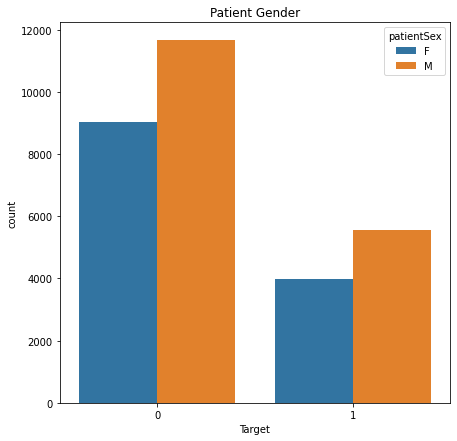

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sex = sns.countplot(x = 'Target', hue = 'patientSex', data = combined)
sex_info = sex.set_title('Patient Gender')

**Observation:**

- The above graph shows that there are more patients without pneumonia in both genders and males are more in both cases.

##### **6. Different classes as per Patient Gender**

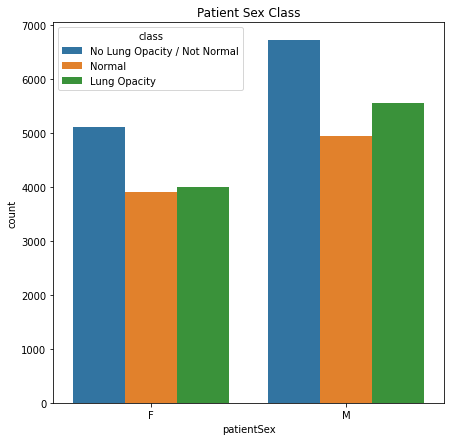

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sex_class = sns.countplot(x = 'patientSex', hue = 'class', data = combined)
sex_class_info = sex_class.set_title('Patient Sex Class')

**Observation:**

- Again in the above graph, Male patients have more records for different classes.

##### **7. Impact on Age and Gender**

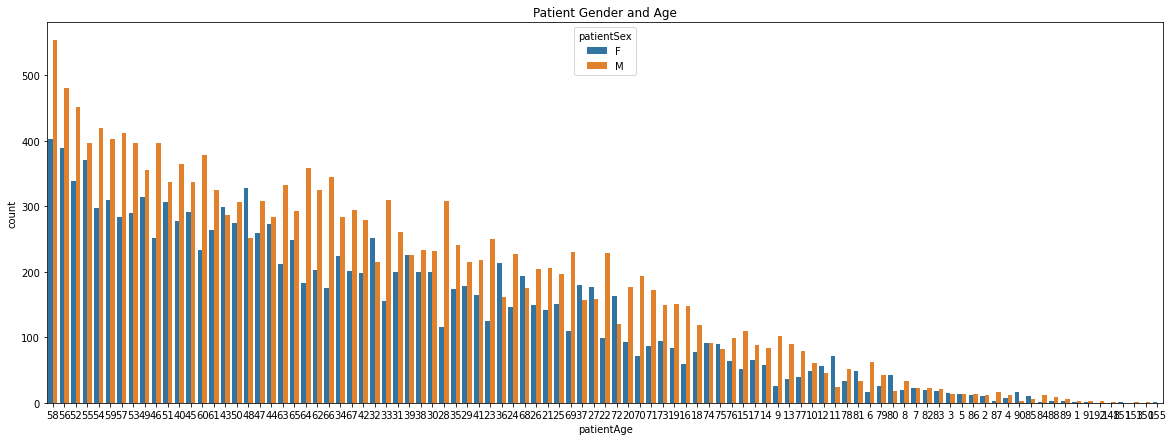

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 7))
age_gender_impact = sns.countplot(x = 'patientAge', hue='patientSex', data = combined, order = combined['patientAge'].value_counts().index)
impact_info = age_gender_impact.set_title('Patient Gender and Age')

**Observation:**

- The above graph shows that Male patients dominate in most age groups.

##### **8. Age and Pneumonia relation**

In [ ]:
pneumonia_patients = combined[combined['Target'] == 1]
print(pneumonia_patients.shape)
pneumonia_patients_sample = pneumonia_patients.sample(9555)
pneumonia_patients_sample['xc'] = pneumonia_patients_sample['x'] + pneumonia_patients_sample['width'] / 2
pneumonia_patients_sample['yc'] = pneumonia_patients_sample['y'] + pneumonia_patients_sample['height'] / 2

(9555, 11)


In [ ]:
pneumonia_patients_sample['patientAge'] = pneumonia_patients_sample['patientAge'].astype(int)
age_groupA = pneumonia_patients_sample[pneumonia_patients_sample['patientAge'] < 20]
age_groupB = pneumonia_patients_sample[(pneumonia_patients_sample['patientAge'] >= 20) & (pneumonia_patients_sample['patientAge'] < 35)]
age_groupC = pneumonia_patients_sample[(pneumonia_patients_sample['patientAge'] >= 35) & (pneumonia_patients_sample['patientAge'] < 50)]
age_groupD = pneumonia_patients_sample[(pneumonia_patients_sample['patientAge'] >= 50) & (pneumonia_patients_sample['patientAge'] < 65)]
age_groupE = pneumonia_patients_sample[pneumonia_patients_sample['patientAge'] >= 65]

In [ ]:
def plot_data(data,color_point, color_window,text):
    fig, ax = plt.subplots(1,1,figsize = (7,7))
    plt.title("Centers of Lung Opacity\n{}".format(text))
    data.plot.scatter(x = 'xc', y = 'yc', xlim = (0,1024), ylim = (0,1024), ax = ax, alpha = 0.8, marker = ".", color = color_point)
    for i, crt_sample in data.iterrows():
        ax.add_patch(Rectangle(xy = (crt_sample['x'], crt_sample['y']),
            width=crt_sample['width'],height = crt_sample['height'],alpha=3.5e-3, color = color_window))
    plt.show()

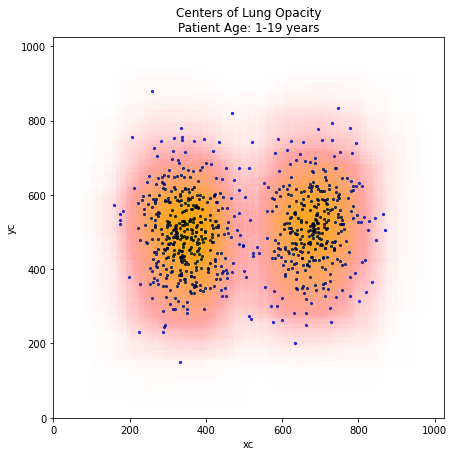

In [ ]:
plot_data(age_groupA,'blue', 'Orange', 'Patient Age: 1-19 years')

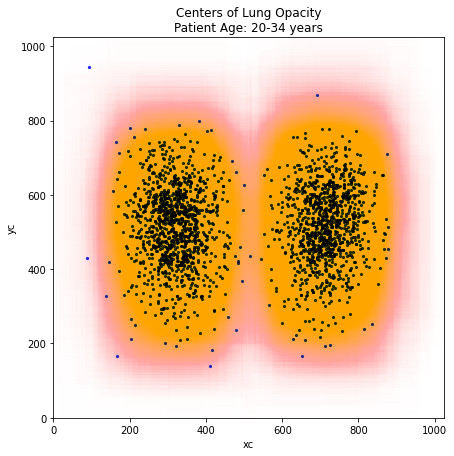

In [ ]:
plot_data(age_groupB,'blue', 'Orange', 'Patient Age: 20-34 years')

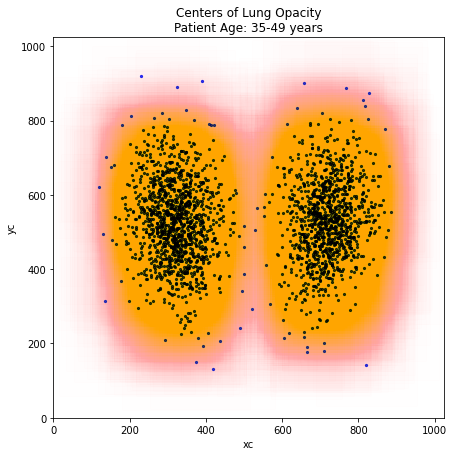

In [ ]:
plot_data(age_groupC,'blue', 'orange', 'Patient Age: 35-49 years')

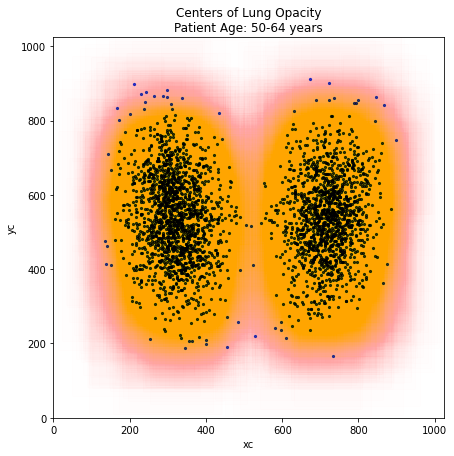

In [ ]:
plot_data(age_groupD,'blue', 'orange', 'Patient Age: 50-64 years')

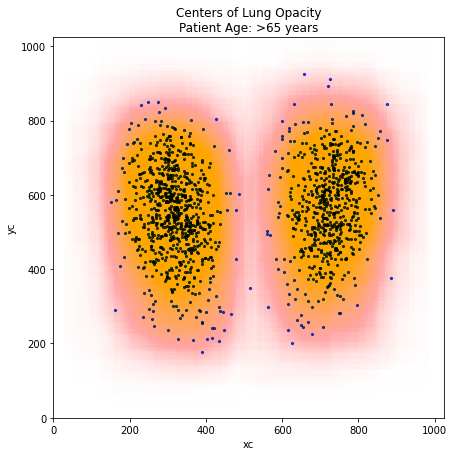

In [ ]:
plot_data(age_groupE,'blue', 'orange', 'Patient Age: >65 years')

**Observation:**

- From the above graphs, we can clearly understands that patients aged between 50 to 65 has more cases of Pneumonia.

##### **9. View position on different features**

**Class**

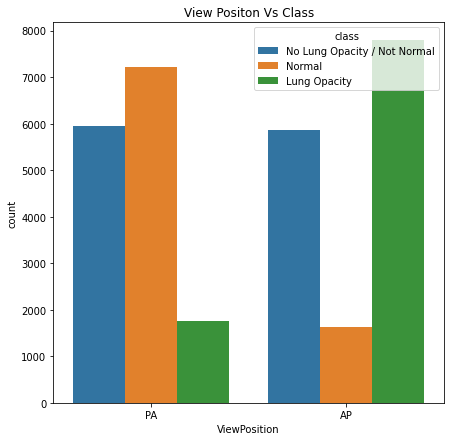

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (7, 7))
VP_vs_Class = sns.countplot(x = 'ViewPosition', hue = 'class', data = combined)
VP_vs_Class_info = VP_vs_Class.set_title('View Positon Vs Class')

**Observation:**

- Patient's from Anterior Posterior (AP) Projection view position have more number of records than the Posterior-Anterior (PA) projection.

**Target**

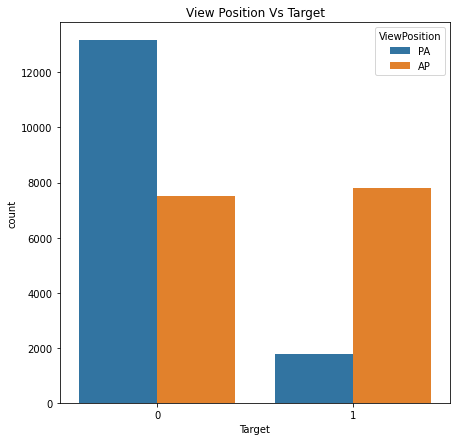

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (7, 7))
VP_vs_Target = sns.countplot(x='Target', hue = 'ViewPosition', data = combined)
VP_vs_Target_info = VP_vs_Target.set_title('View Position Vs Target')

**Observation:**

- Patients with AP view position has more number of records than PA.

**Gender Wise**

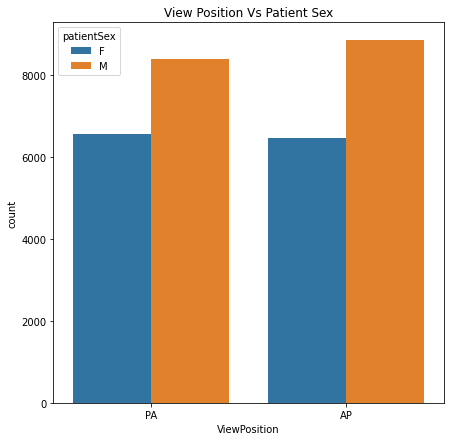

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (7, 7))
VP_vs_Sex = sns.countplot(x='ViewPosition', hue='patientSex', data = combined)
VP_vs_Sex_info = VP_vs_Sex.set_title('View Position Vs Patient Sex')

**Observation:**

- Patients with AP view position has more records than PA.
- Male patients also dominate in both.

**Age wise**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


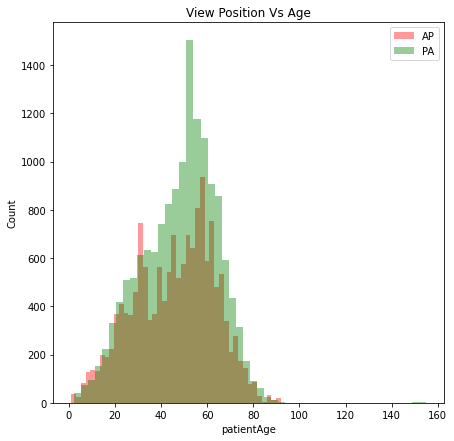

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))

Age_vs_viewposn = sns.distplot(combined[combined['ViewPosition']=='AP']['patientAge'], hist=True, kde=False, color='red', label='AP')
Age_vs_viewposn = sns.distplot(combined[combined['ViewPosition']=='PA']['patientAge'], hist=True, kde=False, color='green', label='PA')
Age_vs_viewposn_count = Age_vs_viewposn.set_ylabel('Count')
Age_vs_viewposn_count = Age_vs_viewposn.legend()
Age_vs_viewposn_count = Age_vs_viewposn.set_title('View Position Vs Age')

**Observation:**

- Furthermore, we observe that AP view position has more numbers of records than PA.

##### **10. Image Loading - Plotting different X-Rays**

In [ ]:
# Function to Read DCM Image
def read_image(patientId):
    train_images = project_path + '/stage_2_train_images/%s.dcm' % patientId
    dcm = pydicom.read_file(train_images)
    return dcm

In [ ]:
def image_grid(df, pid_sample_list, nrows=3, ncols=3, draw_bbox=True, ax_off=True):
    fig = plt.figure(figsize=(16, 12))
    for i in range(nrows * ncols):
        patient_id = pid_sample_list[i]
        img = read_image(patient_id).pixel_array
        ax = fig.add_subplot(nrows, ncols, i + 1)
        plt.imshow(img, cmap='gray')
        ax.set_title(patient_id)
        if ax_off: 
            ax.set_axis_off()
        if draw_bbox:
            bbox_rows = combined[combined['patientId'] == patient_id]
            for _, row in bbox_rows.iterrows():
                x, y = row['x'], row['y']
                width, height = row['width'], row['height']
                bbox = patches.Rectangle((x, y), width, height, linewidth=.5, edgecolor='r', facecolor='none')
                ax.add_patch(bbox)
    plt.tight_layout()
    plt.subplots_adjust(wspace=.01, hspace=.01)
    return fig

Label: No Lung Opacity / Not Normal
0004cfab-14fd-4e49-80ba-63a80b6bddd6


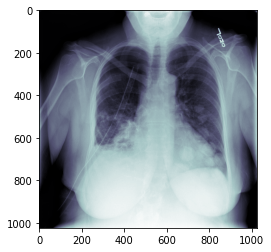

In [ ]:
#DICOM image with class label "No Lung Opacity / Not Normal"

print('Label: No Lung Opacity / Not Normal')
print(class_info['patientId'][0])

filename = class_info['patientId'][0] + '.dcm'
filename = (os.path.join(project_path,'stage_2_train_images',filename))

dataset = pyd.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

Label: Normal
003d8fa0-6bf1-40ed-b54c-ac657f8495c5


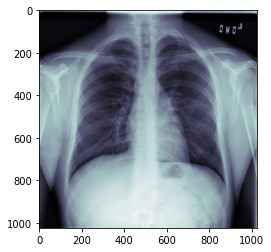

In [ ]:
#DICOM image with class label "Normal"

print('Label: Normal')
print(class_info['patientId'][3])

filename = class_info['patientId'][3] + '.dcm'
filename = (os.path.join(project_path,'stage_2_train_images',filename))

dataset = pyd.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

Label: Lung Opacity
00436515-870c-4b36-a041-de91049b9ab4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


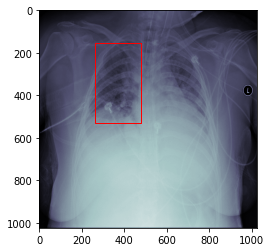

In [ ]:
#DICOM image with class label "Lung Opacity"

from matplotlib.patches import Rectangle

print('Label: Lung Opacity')
print(labels['patientId'][4])

filename = labels['patientId'][4] + '.dcm'
filename = (os.path.join(project_path,'stage_2_train_images',filename))

dataset = pyd.dcmread(filename)

plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)

bb = Rectangle((labels['x'][4], labels['y'][4]), labels['width'][4], labels['height'][4], fill=False, color='red')

plt.axes().add_patch(bb)
plt.show()

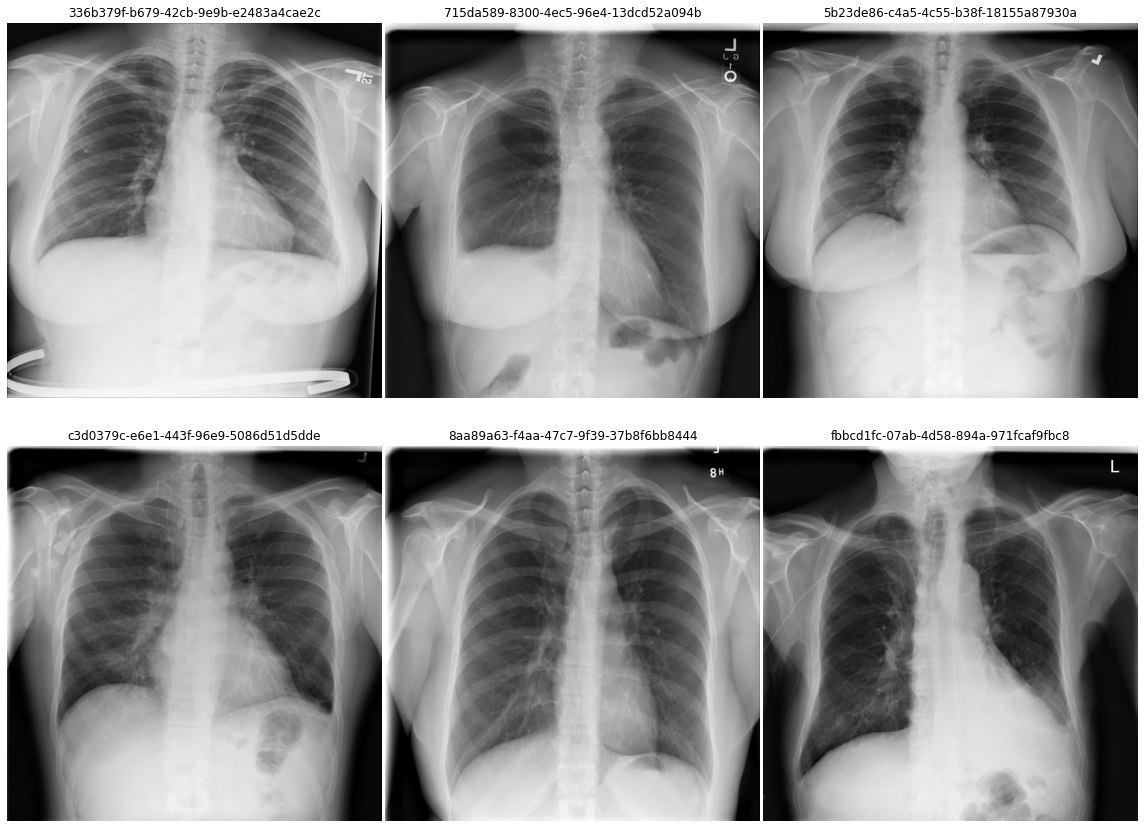

In [ ]:
import pydicom
xrays = combined[combined['ViewPosition']=='PA']['patientId'].sample(20).tolist()
xrays_grid = image_grid(combined, xrays, nrows=2, ncols=3)

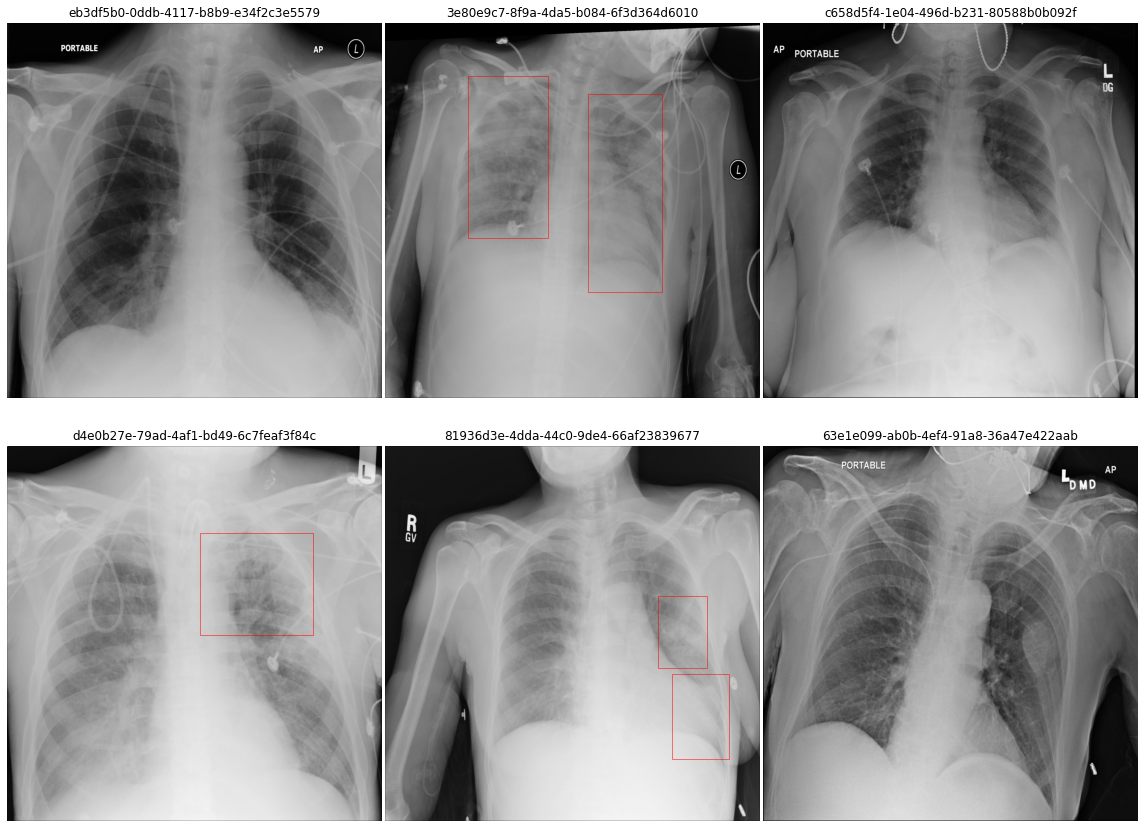

In [ ]:
xrays = combined[combined['ViewPosition']=='AP']['patientId'].sample(20).tolist()
xrays_grid = image_grid(combined, xrays, nrows=2, ncols=3)

## **Model Building**

In [ ]:
#Splitting into training and validation dataset for input into data generator functions

from sklearn.model_selection import train_test_split

df = combined[['patientId','Target']]
df = df.drop_duplicates()

patientId = df['patientId']
Target = df['Target']

X_train, X_val, Y_train, Y_val = train_test_split(patientId,Target, test_size=0.4, random_state=42)

#Print the distribution of labels between the training and validation dataset
print("Ratio of Pnuemonia to Non-Pnuemonia Labels in training dataset is: {}".format(round(Y_train.value_counts()[1] \
                                                                                         /len(Y_train),2)))
print("Ratio of Pnuemonia to Non-Pnuemonia Labels in validation dataset is: {}".format(round(Y_val.value_counts()[1] \
                                                                                         /len(Y_val),2)))
print("No. of records in training dataset is: {}".format(len(X_train)))
print("No. of records in validation dataset is: {}".format(len(X_val)))

Ratio of Pnuemonia to Non-Pnuemonia Labels in training dataset is: 0.22
Ratio of Pnuemonia to Non-Pnuemonia Labels in validation dataset is: 0.23
No. of records in training dataset is: 16010
No. of records in validation dataset is: 10674


**Data Processing**

Extract Data from DICOM file

In [ ]:
combined_sample = combined.sample(n=30227) 

In [ ]:
temp_data_directory = project_path + 'pneumonia_status' 
print(temp_data_directory)
os.mkdir(f'{temp_data_directory}')
os.mkdir(f'{temp_data_directory}/positive')
os.mkdir(f'{temp_data_directory}/negative')

/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status


In [ ]:
for value in combined_sample['patientId']:
  !cp '/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_train_images/{value}.dcm' '/content/drive/MyDrive/Colab Notebooks/Capstone Project/project_path/'

In [ ]:
combined_sample['path']=f'{temp_data_directory}'+'/'+combined_sample['patientId'].astype(str)+'.dcm'
print(temp_data_directory)

/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status


In [ ]:
import pydicom
age, gender, view_posn, study_id = [], [], [], []

combined_sample['age'] = 0
combined_sample['sex'] = ''
combined_sample['ViewPosition'] = ''
combined_sample['StudyID'] = ''
counter = 0
for value in combined_sample['patientId']:
  counter = counter + 1
  patient_Target = (pd.to_numeric(combined_sample[combined_sample['patientId'] == value]['Target'],downcast ='signed', errors='coerce')) < 1
  dcm_patientFile = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/%s.dcm' % value
  dcm_patientData = pydicom.read_file(dcm_patientFile)
  age.append(dcm_patientData.PatientAge)
  gender.append(dcm_patientData.PatientSex)
  view_posn.append(dcm_patientData.ViewPosition)
  study_id.append(dcm_patientData.StudyID)

combined_sample['age'] = age
combined_sample['sex'] = gender
combined_sample['ViewPosition'] = view_posn
combined_sample['StudyID'] = study_id
   
combined_sample.head(10)

,patientId,class,x,y,width,height,Target,patientAge,patientSex,ViewPosition,StudyID,path,age,sex
23652,d4d8605c-985b-421b-801e-206d98e55249,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,38,M,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,38,M
23530,d3ebec27-0938-46c2-80fa-85ad7871421f,Normal,NaN,NaN,NaN,NaN,0,82,F,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,82,F
25624,e5614d99-2fb8-45f8-86ee-ff1f6f0db802,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,61,F,AP,,/content/drive/MyDrive/Colab Notebooks/Capston...,61,F
5629,484a4f31-82d5-4ab1-9213-1566ae6ca14e,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,61,M,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,61,M
12370,7e64761d-6224-4888-8976-75453b8fc842,Normal,NaN,NaN,NaN,NaN,0,27,F,AP,,/content/drive/MyDrive/Colab Notebooks/Capston...,27,F
12021,7ba79be9-498c-48f0-bf66-8f9b2a86ab76,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,56,F,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,56,F
9555,68644ae1-22cf-4237-b7af-85d66df34672,Normal,NaN,NaN,NaN,NaN,0,43,F,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,43,F
17931,aa8377bb-0c43-4c48-b185-bf96cc5c6537,Normal,NaN,NaN,NaN,NaN,0,52,M,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,52,M
19687,b6276787-bf66-4151-9f7a-b3d7fdf5ae30,Lung Opacity,95.0,303.0,258.0,178.0,1,33,M,AP,,/content/drive/MyDrive/Colab Notebooks/Capston...,33,M
953,0bae27f3-01d4-4223-adc5-d3264e0d9213,Lung Opacity,126.0,321.0,298.0,171.0,1,28,M,AP,,/content/drive/MyDrive/Colab Notebooks/Capston...,28,M


In [ ]:
combined_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 23652 to 4785
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     30227 non-null  object 
 1   class         30227 non-null  object 
 2   x             9555 non-null   float64
 3   y             9555 non-null   float64
 4   width         9555 non-null   float64
 5   height        9555 non-null   float64
 6   Target        30227 non-null  int64  
 7   patientAge    30227 non-null  object 
 8   patientSex    30227 non-null  object 
 9   ViewPosition  30227 non-null  object 
 10  StudyID       30227 non-null  object 
 11  path          30227 non-null  object 
 12  age           30227 non-null  object 
 13  sex           30227 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 3.5+ MB


**Splitting Data into relative classes**

In [ ]:
non_pneumonia = combined_sample[combined_sample['Target']==0]
print(len(non_pneumonia))
non_pneumonia.head()

20672


,patientId,class,x,y,width,height,Target,patientAge,patientSex,ViewPosition,StudyID,path,age,sex
23652,d4d8605c-985b-421b-801e-206d98e55249,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,38,M,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,38,M
23530,d3ebec27-0938-46c2-80fa-85ad7871421f,Normal,NaN,NaN,NaN,NaN,0,82,F,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,82,F
25624,e5614d99-2fb8-45f8-86ee-ff1f6f0db802,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,61,F,AP,,/content/drive/MyDrive/Colab Notebooks/Capston...,61,F
5629,484a4f31-82d5-4ab1-9213-1566ae6ca14e,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,61,M,PA,,/content/drive/MyDrive/Colab Notebooks/Capston...,61,M
12370,7e64761d-6224-4888-8976-75453b8fc842,Normal,NaN,NaN,NaN,NaN,0,27,F,AP,,/content/drive/MyDrive/Colab Notebooks/Capston...,27,F


In [ ]:
pneumonia = combined_sample[combined_sample['Target']==1]
pneumonia_cases = pneumonia[['path','patientId']]
path = pneumonia_cases['path'].unique()
patientId = pneumonia_cases['patientId'].unique()

In [ ]:
pneumonia_cases = pd.DataFrame({'path':path,'patientId':patientId})
len(pneumonia_cases)

6012

In [ ]:
from tqdm import tqdm
from skimage.transform import resize

for _,row in tqdm(pneumonia_cases.iterrows()):
    img=pydicom.read_file(row['path']).pixel_array
    img=resize(img,(256,256))
    plt.imsave(f'/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/positive/'+row['patientId']+'.jpg',img,cmap='gray')

In [ ]:
non_pneumonia = combined_sample[combined_sample['Target']==0]
no_pneumonia = non_pneumonia[['path','patientId']]
path = no_pneumonia['path'].unique()
patientId = no_pneumonia['patientId'].unique()

In [ ]:
no_pneumonia = pd.DataFrame({'path':path,'patientId':patientId})
len(no_pneumonia)

20672

In [ ]:
for _,row in tqdm(no_pneumonia.iterrows()):
    img=pydicom.read_file(row['path']).pixel_array
    img=resize(img,(256,256))
    plt.imsave(f'/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/negative/'+row['patientId']+'.jpg',img,cmap='gray')

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input

In [ ]:
datagen=ImageDataGenerator(samplewise_center = True, samplewise_std_normalization = True, horizontal_flip = True,
                          width_shift_range = 0.05, rescale = 1/255, fill_mode = 'nearest', height_shift_range = 0.05,
                           preprocessing_function = preprocess_input, validation_split = 0.1,
                          )

In [ ]:
train=datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status', color_mode = 'rgb', batch_size = 128, class_mode = 'binary', subset = 'training')
test=datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status', color_mode = 'rgb', batch_size = 32, class_mode = 'binary', subset = 'validation')

Found 24016 images belonging to 2 classes.
Found 2668 images belonging to 2 classes.


In [ ]:
train.class_indices

{'negative': 0, 'positive': 1}

##### **1. VGG19**

In [ ]:
from keras.applications.vgg19 import VGG19
pre_trained_model = VGG19(input_shape = (256,256,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,LeakyReLU,GaussianDropout

model = Flatten()(last_output)
model = Dense(1024)(model)
model=LeakyReLU(0.1)(model)
model=Dropout(0.25)(model)
model=BatchNormalization()(model)
model= Dense(1024)(model)
model=LeakyReLU(0.1)(model)
model=Dropout(0.25)(model)
model=BatchNormalization()(model)
model= Dense(1, activation='sigmoid')(model)

In [ ]:
from tensorflow.keras.models import Model


vgg19model = Model(pre_trained_model.input, model) 

vgg19model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early=EarlyStopping(monitor='accuracy',patience=3,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=0)

In [ ]:
class_weight={0:1,1:3.3}

In [ ]:
vgg19model.fit(train, epochs = 20, callbacks = [reduce_lr], steps_per_epoch = 100, validation_data = test, class_weight = class_weight)

Epoch 1/20
100/100 [==============================] - 1598s 16s/step - loss: 1.0862 - accuracy: 0.6859 - val_loss: 0.4961 - val_accuracy: 0.7654 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 843s 8s/step - loss: 0.8307 - accuracy: 0.7298 - val_loss: 0.5238 - val_accuracy: 0.7414 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 851s 8s/step - loss: 0.7711 - accuracy: 0.7413 - val_loss: 0.4468 - val_accuracy: 0.7830 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 888s 9s/step - loss: 0.7618 - accuracy: 0.7465 - val_loss: 0.4484 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 931s 9s/step - loss: 0.7312 - accuracy: 0.7499 - val_loss: 0.4968 - val_accuracy: 0.7455 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 925s 9s/step - loss: 0.7154 - accuracy: 0.7604 - val_loss: 0.4452 - val_accuracy: 0.7849 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - 908s 9s/

**Save the Model**

In [ ]:
vgg19model.save('/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/vgg19_model.h5')

**Plotting Accuracy and Validation Accuracy**

<Figure size 2160x1440 with 0 Axes>

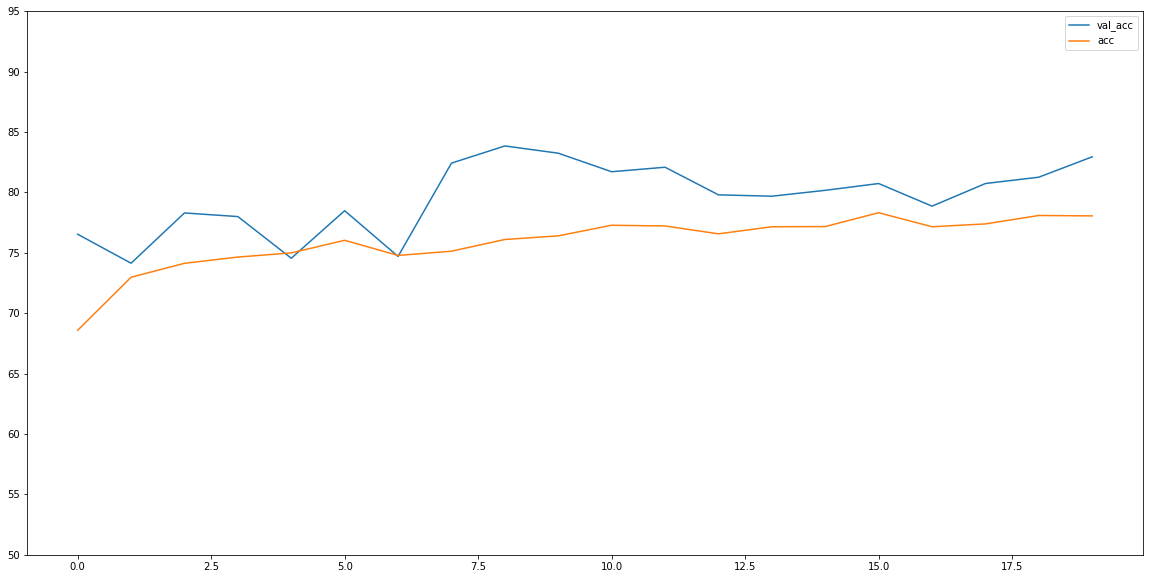

In [ ]:
plt.figure(figsize=(30,20))
val_acc=np.asarray(vgg19model.history.history['val_accuracy'])*100
acc=np.asarray(vgg19model.history.history['accuracy'])*100
acc=pd.DataFrame({'val_acc':val_acc,'acc':acc})
acc.plot(figsize=(20,10),yticks=range(50,100,5))

**Plotting Loss and Validation Loss**

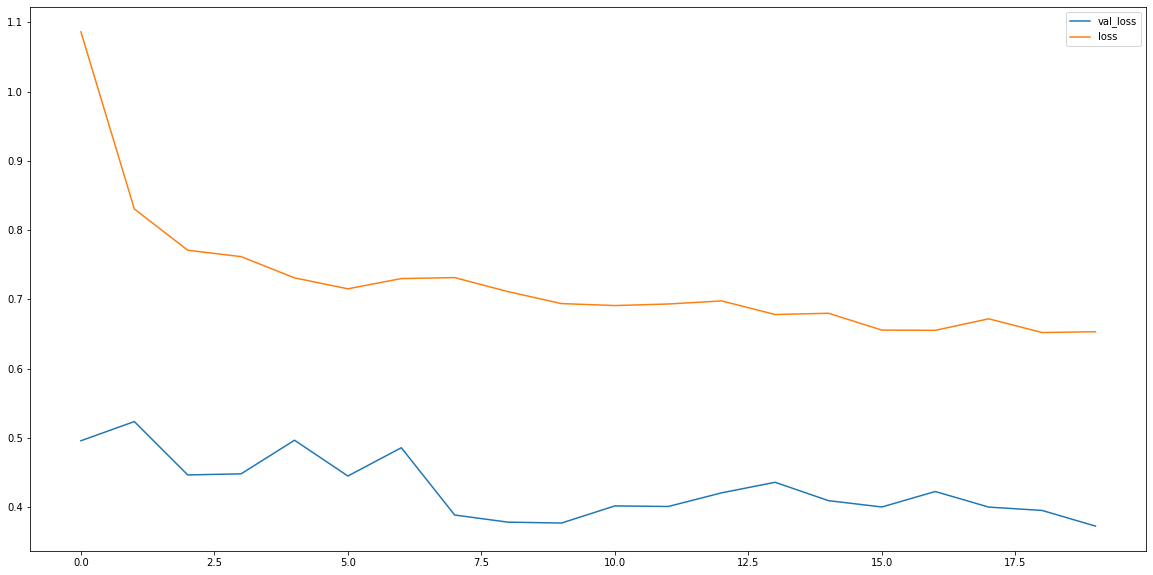

In [ ]:
loss=vgg19model.history.history['loss']
val_loss=vgg19model.history.history['val_loss']
loss=pd.DataFrame({'val_loss':val_loss,'loss':loss})
loss.plot(figsize=(20,10))

**Model testing**

In [ ]:
y=[]

test.reset()

for i in tqdm(range(4)):
    _,target=test.__getitem__(i)
    for j in target:
        y.append(j)

100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


In [ ]:
test.reset()
y_pred=vgg19model.predict(test)

In [ ]:
pred=[]
for i in y_pred:
    if i[0]>=0.5:
        pred.append(1)
    else:
        pred.append(0)

In [ ]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,classification_report

In [ ]:
print(classification_report(y,pred[:len(y)]))

              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87       107
         1.0       0.44      0.76      0.56        21

    accuracy                           0.80       128
   macro avg       0.70      0.79      0.72       128
weighted avg       0.86      0.80      0.82       128



**AUC Curve**

The area under the curve is: 0.8958611481975968


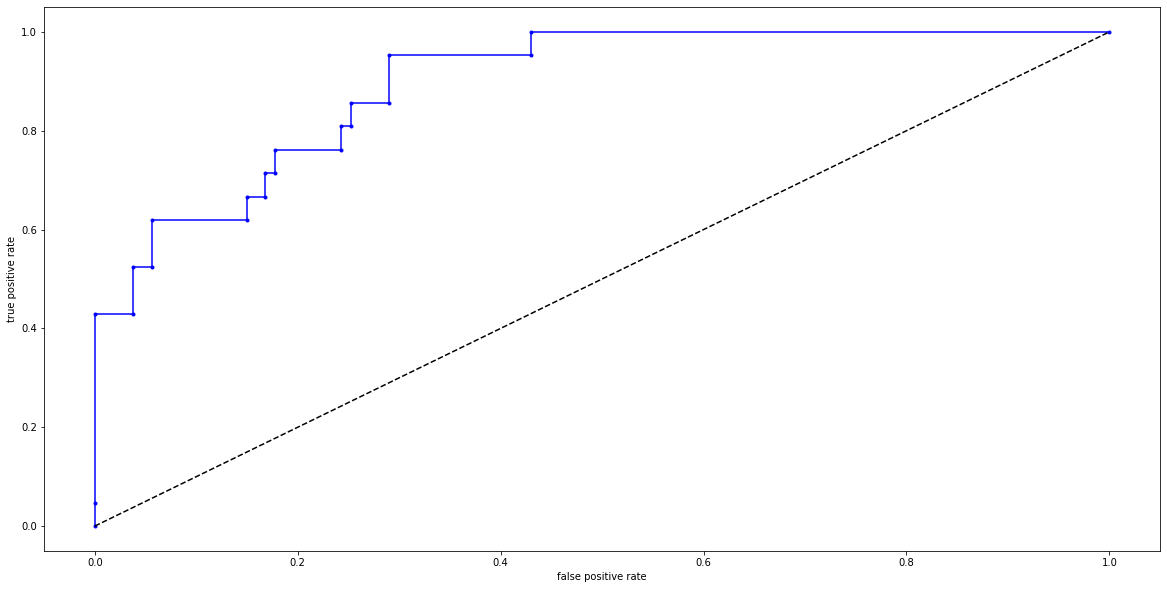

In [ ]:
plt.figure(figsize=(20,10))
fprr,tprr,_=roc_curve(y,y_pred[:len(y)])
area_under_curver=auc(fprr,tprr)
print('The area under the curve is:',area_under_curver)
# Plot area under curve
plt.plot(fprr,tprr,'b.-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fprr,fprr,linestyle='--',color='black')

##### **Prediction**

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
#Setting the dimensions of our images
img_width, img_height = 256,256

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
# load the model we saved
model = load_model('/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/vgg19model.h5')
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# image path
img_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/positive/000db696-cf54-4385-b10b-6b16fbb3f985.jpg'       # positive
#img_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/negative/52836696-f108-4ada-b6f8-3de1221fb7ac.jpg'      # negative

In [ ]:
# load a single image
test_image = load_image(img_path)

In [ ]:
# check prediction
prediction = model.predict(test_image)

In [ ]:
print(prediction)

[[0.80154574]]


##### **2. VGG16**

In [ ]:
import keras
from tensorflow.keras import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

vgg_model = VGG16(input_shape = (256,256,3),include_top = False,weights = 'imagenet')
output = vgg_model.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg_model.input, output)

for layer in vgg_model.layers:
  layer.trainable = False

vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                            

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape=(256,256,3)
vmodel = Sequential()
vmodel.add(vgg_model)
vmodel.add(Dense(512, activation='relu', input_dim=input_shape))
vmodel.add(Dropout(0.3))
vmodel.add(Dense(512, activation='relu'))
vmodel.add(Dropout(0.3))
vmodel.add(Dense(1, activation='sigmoid'))

##### **Compile Model**

In [ ]:
vmodel.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
vmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 32768)             14714688  
                                                                 
 dense_3 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,755,585
Trainable params: 17,040,897
No

##### **Train the Model**

In [ ]:
vmodel.fit(train,epochs=10,callbacks=[reduce_lr],steps_per_epoch=100,validation_data=test,class_weight=class_weight)

Epoch 1/10
100/100 [==============================] - 699s 7s/step - loss: 0.7719 - accuracy: 0.7557 - val_loss: 0.3528 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 682s 7s/step - loss: 0.7680 - accuracy: 0.7663 - val_loss: 0.3901 - val_accuracy: 0.8130 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 685s 7s/step - loss: 0.7699 - accuracy: 0.7585 - val_loss: 0.4026 - val_accuracy: 0.8197 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 680s 7s/step - loss: 0.7564 - accuracy: 0.7712 - val_loss: 0.3508 - val_accuracy: 0.8325 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 695s 7s/step - loss: 0.7526 - accuracy: 0.7566 - val_loss: 0.3905 - val_accuracy: 0.8145 - lr: 0.0010
Epoch 6/10
100/100 [==============================] - ETA: 0s - loss: 0.7623 - accuracy: 0.7687
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 [==============================] - 671s 

**Saving the Model**

In [ ]:
vmodel.save(f'/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/vgg16_model.h5')

**Plotting accuracy and validation accuracy**

<Figure size 2880x2160 with 0 Axes>

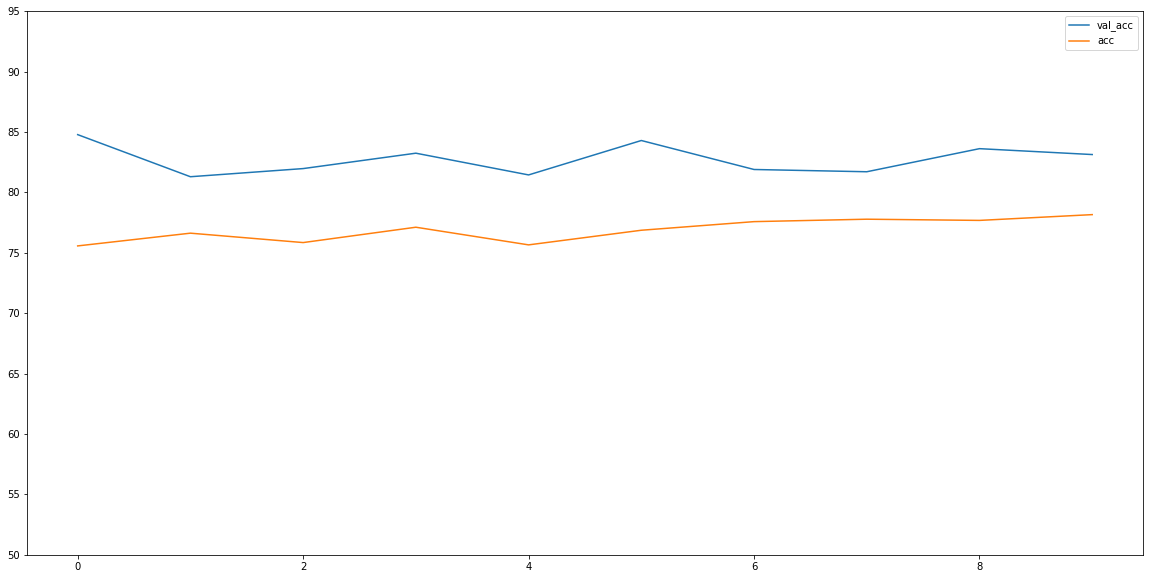

In [ ]:
plt.figure(figsize=(40,30))
vval_acc=np.asarray(vmodel.history.history['val_accuracy'])*100
vacc=np.asarray(vmodel.history.history['accuracy'])*100
vacc=pd.DataFrame({'val_acc':vval_acc,'acc':vacc})
vacc.plot(figsize=(20,10),yticks=range(50,100,5))

**Plotting Loss and Validation Loss**

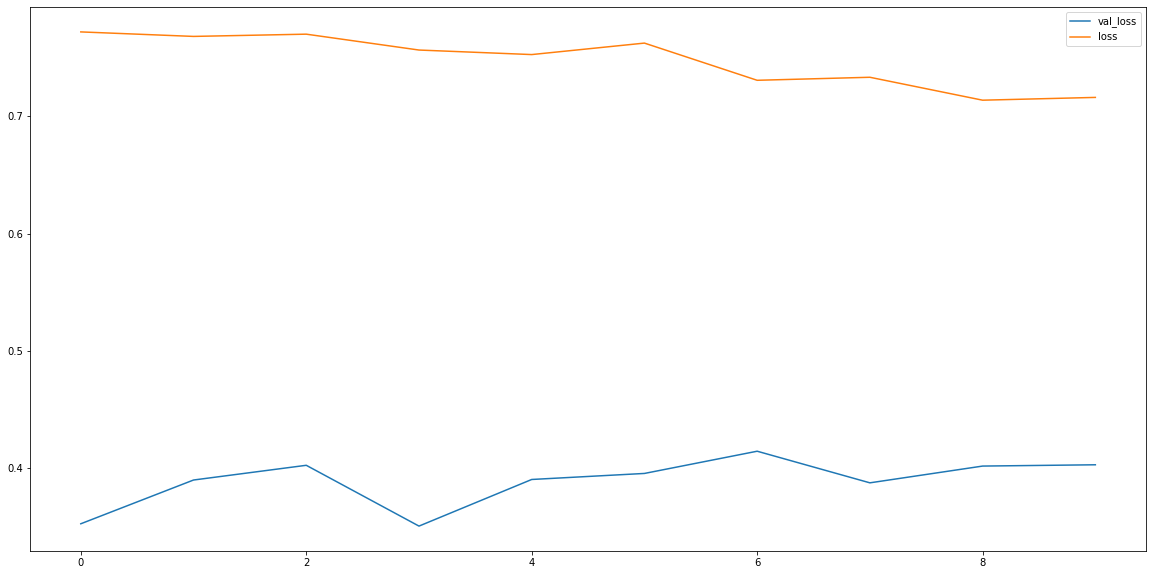

In [ ]:
vloss=vmodel.history.history['loss']
vval_loss=vmodel.history.history['val_loss']
vloss=pd.DataFrame({'val_loss':vval_loss,'loss':vloss})
vloss.plot(figsize=(20,10))

**Model Testing**

In [ ]:
y=[]

test.reset()

for i in tqdm(range(4)):
    _,target=test.__getitem__(i)
    for j in target:
        y.append(j)

100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


In [ ]:
test.reset()
y_predv=vmodel.predict(test)

In [ ]:
predv=[]
for i in y_predv:
    if i[0]>=0.5:
        predv.append(1)
    else:
        predv.append(0)

**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,classification_report

print(classification_report(y,predv[:len(y)]))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       107
         1.0       0.58      0.86      0.69        21

    accuracy                           0.88       128
   macro avg       0.77      0.87      0.81       128
weighted avg       0.91      0.88      0.88       128



The area under the curve is: 0.9187805963506899


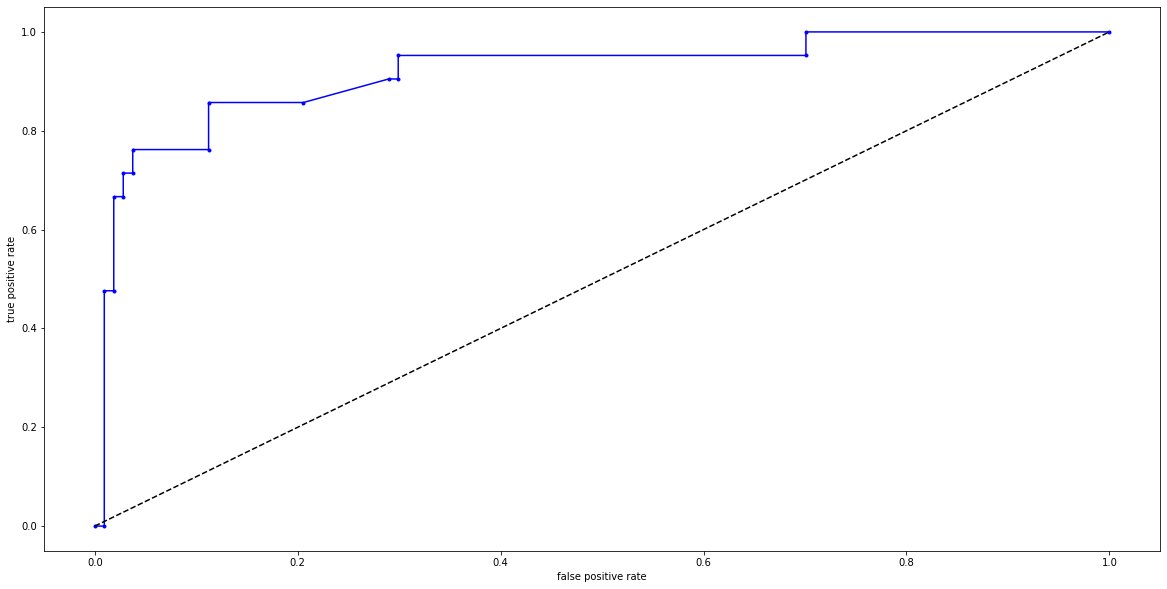

In [ ]:
plt.figure(figsize=(20,10))
fprv,tprv,_=roc_curve(y,y_predv[:len(y)])
area_under_curvev=auc(fprv,tprv)
print('The area under the curve is:',area_under_curvev)
# Plot area under curve
plt.plot(fprv,tprv,'b.-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fprv,fprv,linestyle='--',color='black')

##### **3. ResNet50**

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50

In [ ]:
import keras

resnet_model = ResNet50(input_shape = (256,256,3), include_top = False, weights = 'imagenet')
output = resnet_model.layers[-1].output
output = keras.layers.Flatten()(output)

resnet_model = Model(resnet_model.input, output)

for layer in resnet_model.layers:
  layer.trainable = False

resnet_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

**Model Compilation**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
input_shape=(256,256,3)
rmodel = Sequential()
rmodel.add(resnet_model)
rmodel.add(Dense(512, activation='relu', input_dim=input_shape))
rmodel.add(Dropout(0.3))
rmodel.add(Dense(512, activation='relu'))
rmodel.add(Dropout(0.3))
rmodel.add(Dense(1, activation='sigmoid'))

rmodel.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

rmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 131072)            23587712  
                                                                 
 dense_6 (Dense)             (None, 512)               67109376  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 90,960,257
Trainable params: 67,372,545


**Model Training**

In [117]:
rmodel.fit(train,epochs=10,callbacks=[reduce_lr],steps_per_epoch=100,validation_data=test,class_weight=class_weight)

Epoch 1/10
100/100 [==============================] - 650s 6s/step - loss: 4.0251 - accuracy: 0.6148 - val_loss: 0.4803 - val_accuracy: 0.7864 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 649s 6s/step - loss: 0.9242 - accuracy: 0.6563 - val_loss: 0.4987 - val_accuracy: 0.7706 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 656s 7s/step - loss: 0.9356 - accuracy: 0.6749 - val_loss: 0.6054 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 657s 7s/step - loss: 0.9366 - accuracy: 0.7444 - val_loss: 0.5513 - val_accuracy: 0.7789 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 668s 7s/step - loss: 1.0049 - accuracy: 0.7379 - val_loss: 0.6352 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 6/10
100/100 [==============================] - 679s 7s/step - loss: 0.9943 - accuracy: 0.7672 - val_loss: 0.6079 - val_accuracy: 0.8111 - lr: 0.0010
Epoch 7/10
100/100 [==============================] - 649s 6s/st

KeyboardInterrupt: ignored

**Saving the Model**

In [118]:
rmodel.save(f'/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/resnet50_model.h5')

**Plotting & Validation Accuracy**

<Figure size 2160x1440 with 0 Axes>

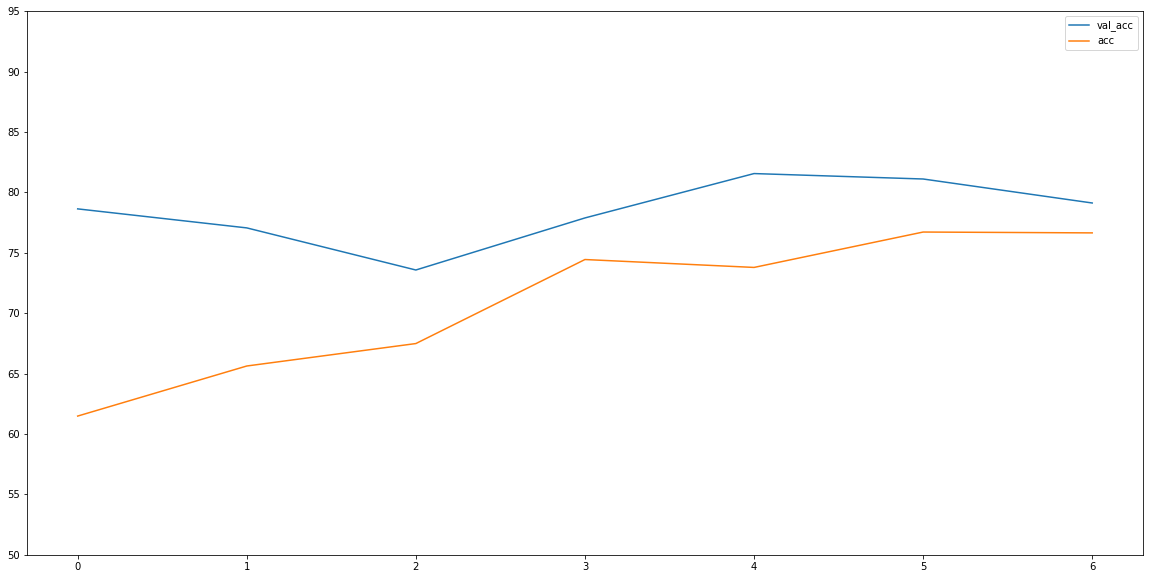

In [119]:
plt.figure(figsize=(30,20))
rval_acc=np.asarray(rmodel.history.history['val_accuracy'])*100
racc=np.asarray(rmodel.history.history['accuracy'])*100
racc=pd.DataFrame({'val_acc':rval_acc,'acc':racc})
racc.plot(figsize=(20,10),yticks=range(50,100,5))

**Plotting & Validation Loss**

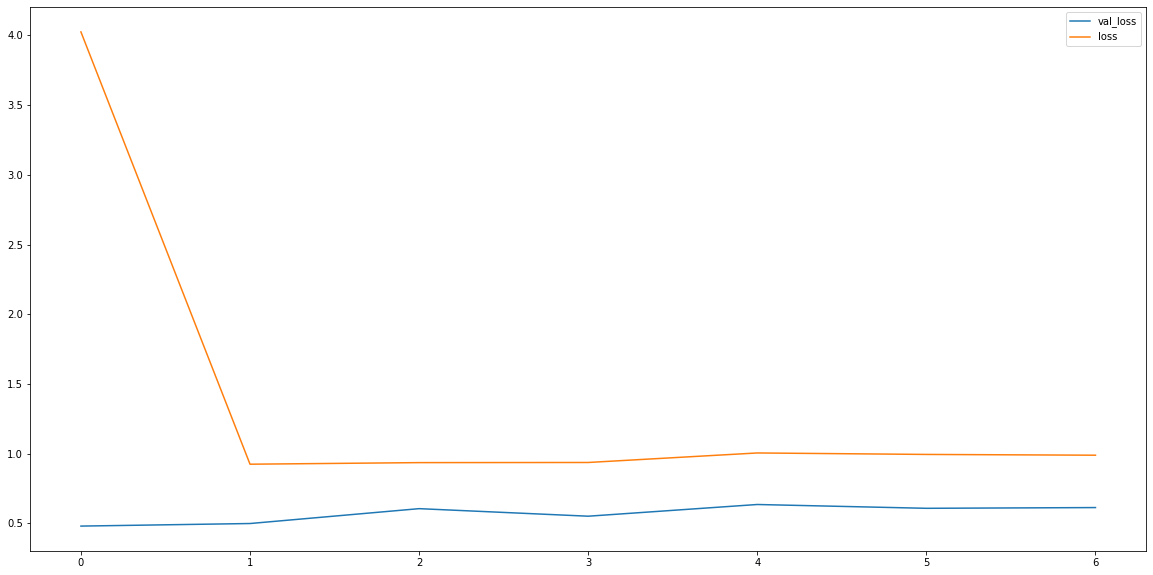

In [120]:
rloss=rmodel.history.history['loss']
rval_loss=rmodel.history.history['val_loss']
rloss=pd.DataFrame({'val_loss':rval_loss,'loss':rloss})
rloss.plot(figsize=(20,10))

**Model Testing**

In [121]:
y=[]

test.reset()

for i in tqdm(range(4)):
    _,target=test.__getitem__(i)
    for j in target:
        y.append(j)

100%|██████████| 4/4 [00:02<00:00,  1.76it/s]


In [122]:
test.reset()
y_predr=rmodel.predict(test)

predr=[]
for i in y_predr:
    if i[0]>=0.5:
        predr.append(1)
    else:
        predr.append(0)

**Classification Report and ROC Curve**

In [123]:
print(classification_report(y,predr[:len(y)]))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       102
         1.0       0.46      0.46      0.46        26

    accuracy                           0.78       128
   macro avg       0.66      0.66      0.66       128
weighted avg       0.78      0.78      0.78       128



The area under the curve is: 0.6649698340874812


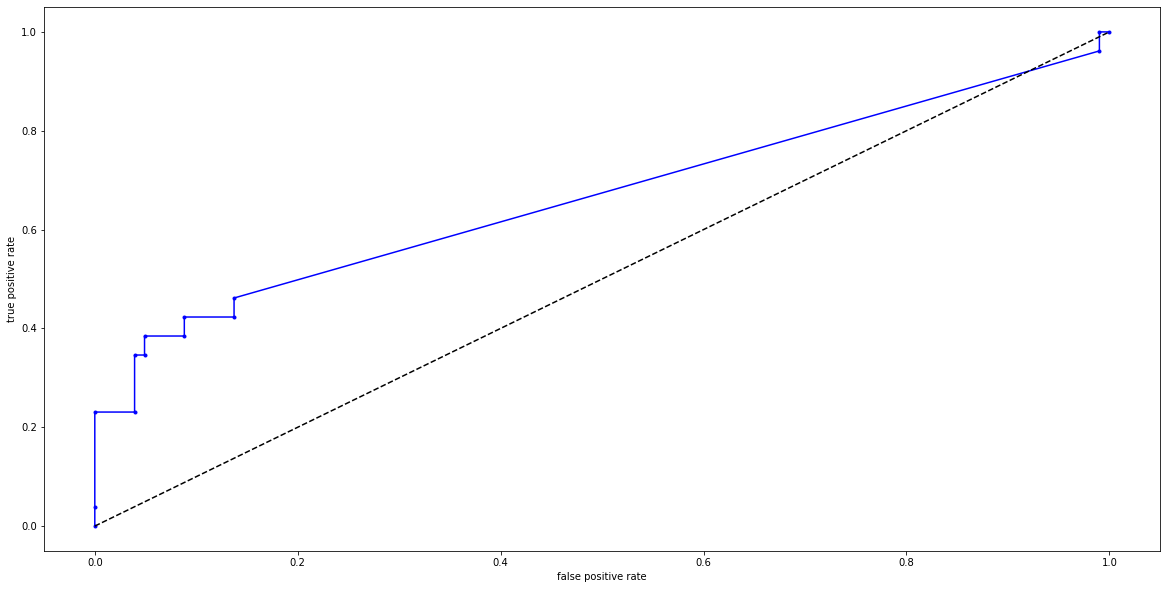

In [124]:
plt.figure(figsize=(20,10))
fprr,tprr,_=roc_curve(y,y_predr[:len(y)])
area_under_curver=auc(fprr,tprr)
print('The area under the curve is:',area_under_curver)
# Plot area under curve
plt.plot(fprr,tprr,'b.-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fprr,fprr,linestyle='--',color='black')

##### **4. InceptionNet v3**

In [125]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [126]:
inception_model = InceptionV3(input_shape = (256,256,3), 
                                include_top = False, 
                                weights = 'imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [127]:
import keras
import keras.utils
from keras import utils as np_utils

output = inception_model.layers[-1].output
output = keras.layers.Flatten()(output)

inception_model = Model(inception_model.input, output)

In [128]:
for layer in inception_model.layers:
  layer.trainable = False

In [129]:
inception_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 rmalization)                   )                                                           

**Model Compilation**

In [130]:
from keras.models import Sequential
from keras.layers import Dropout

input_shape=(256,256,3)
incept_model = Sequential()
incept_model.add(inception_model)
incept_model.add(Dense(512, activation='relu', input_dim=input_shape))
incept_model.add(Dropout(0.3))
incept_model.add(Dense(512, activation='relu'))
incept_model.add(Dropout(0.3))
incept_model.add(Dense(1, activation='sigmoid'))

incept_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [131]:
incept_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 73728)             21802784  
                                                                 
 dense_9 (Dense)             (None, 512)               37749248  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 59,815,201
Trainable params: 38,012,417


**Model Training**

In [132]:
incept_model.fit(train,epochs=5,callbacks=[reduce_lr],steps_per_epoch=100,validation_data=test,class_weight=class_weight)

Epoch 1/5
100/100 [==============================] - 521s 5s/step - loss: 3.0226 - accuracy: 0.6467 - val_loss: 0.5382 - val_accuracy: 0.7196 - lr: 0.0010
Epoch 2/5
100/100 [==============================] - 390s 4s/step - loss: 0.9426 - accuracy: 0.5880 - val_loss: 0.5049 - val_accuracy: 0.7275 - lr: 0.0010
Epoch 3/5
  2/100 [..............................] - ETA: 5:16 - loss: 0.8506 - accuracy: 0.6250

KeyboardInterrupt: ignored

**Saving the Model**

In [133]:
incept_model.save(f'/content/drive/MyDrive/Colab Notebooks/Capstone Project/pneumonia_status/inceptionnet_model.h5')

**Plotting & Validation Accuracy**

<Figure size 2160x1440 with 0 Axes>

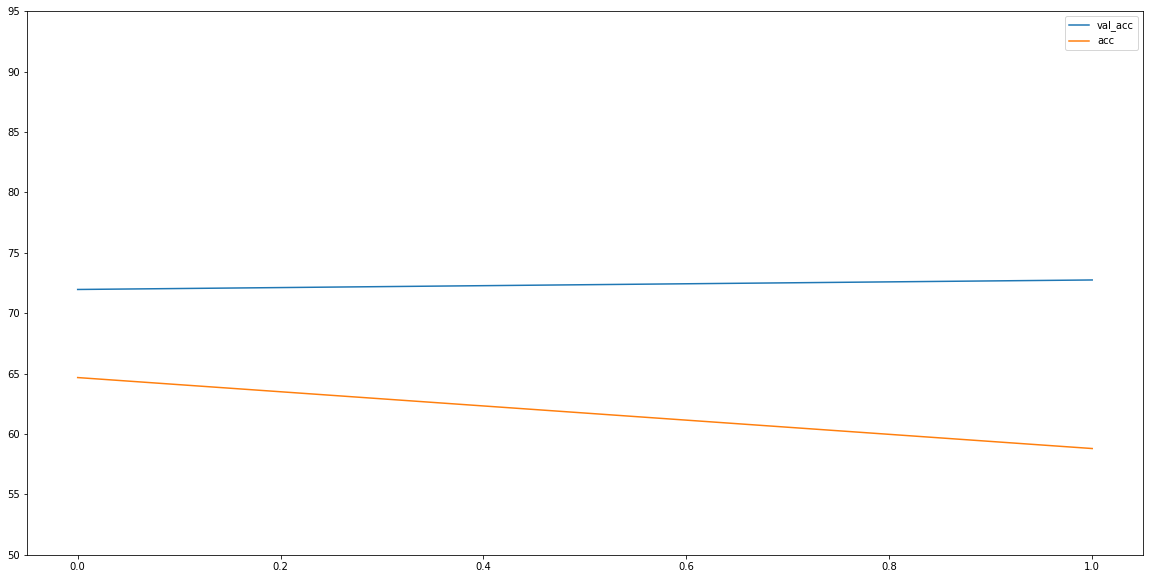

In [134]:
plt.figure(figsize=(30,20))
incval_acc=np.asarray(incept_model.history.history['val_accuracy'])*100
incacc=np.asarray(incept_model.history.history['accuracy'])*100
incacc=pd.DataFrame({'val_acc':incval_acc,'acc':incacc})
incacc.plot(figsize=(20,10),yticks=range(50,100,5))

**Plotting & Validation Loss**

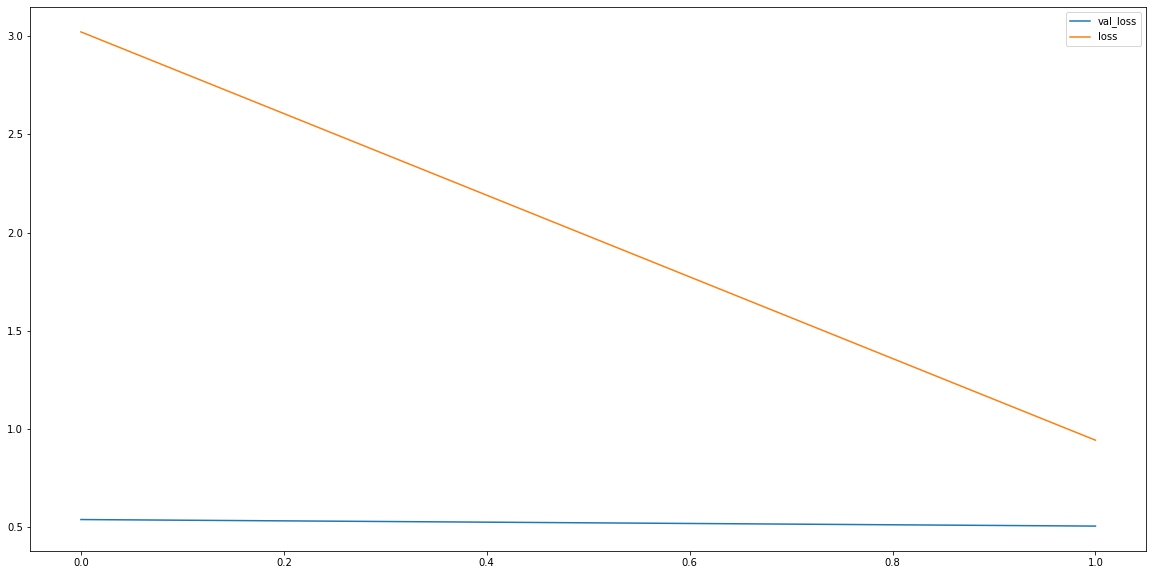

In [135]:
inc_loss=incept_model.history.history['loss']
inc_val_loss=incept_model.history.history['val_loss']
inc_loss=pd.DataFrame({'val_loss':inc_val_loss,'loss':inc_loss})
inc_loss.plot(figsize=(20,10))

**Model testing**

In [136]:
y=[]

test.reset()

for i in tqdm(range(4)):
    _,target=test.__getitem__(i)
    for j in target:
        y.append(j)

100%|██████████| 4/4 [00:02<00:00,  1.73it/s]


In [137]:
test.reset()
y_predi=incept_model.predict(test)

predi=[]
for i in y_predi:
    if i[0]>=0.5:
        predi.append(1)
    else:
        predi.append(0)

**Classification report & ROC Curve**

In [138]:
print(classification_report(y,predi[:len(y)]))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81        90
         1.0       0.56      0.66      0.60        38

    accuracy                           0.74       128
   macro avg       0.70      0.72      0.71       128
weighted avg       0.76      0.74      0.75       128



The area under the curve is: 0.7976608187134503


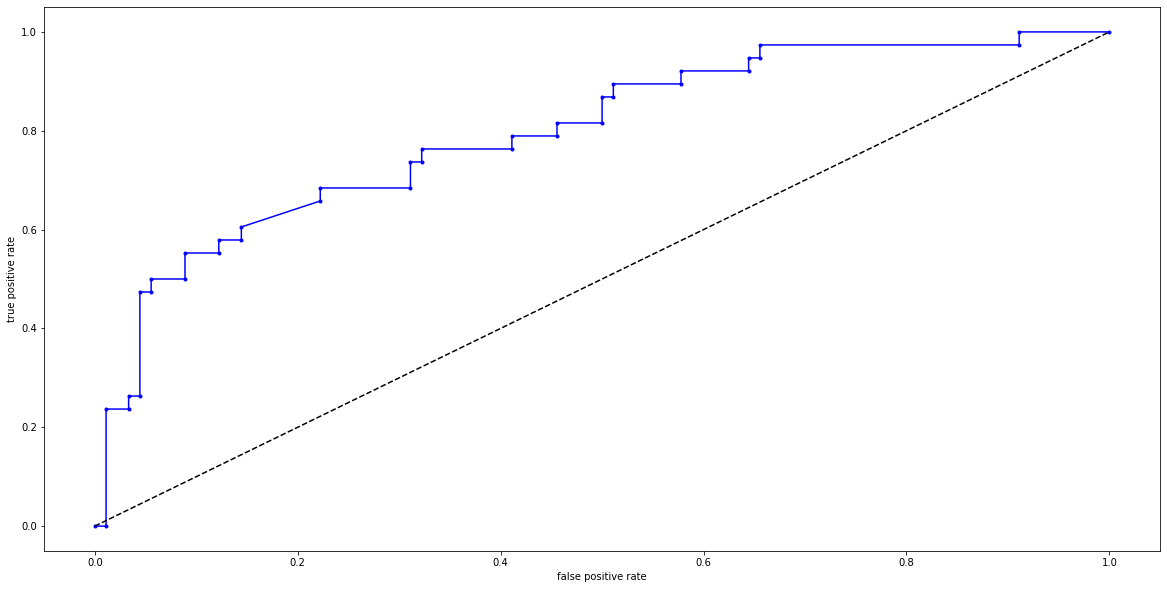

In [139]:
plt.figure(figsize=(20,10))
fpri,tpri,_=roc_curve(y,y_predi[:len(y)])
area_under_curvei=auc(fpri,tpri)
print('The area under the curve is:',area_under_curvei)
# Plot area under curve
plt.plot(fpri,tpri,'b.-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpri,fpri,linestyle='--',color='black')

## **Summary**

**Results:**

- The four Models namely; **VGG19, VGG16, ResNet50** and **InceptionNet v3** were trained on the provided dataset and their performances were as follows:

    1. VGG19: Train Accuracy - **78%** and Validation Accuracy - **80%**.

    2. VGG16: Train Accuracy - **78%** and Validation Accuracy - **88%**.

    3. ResNet50: Train Accuracy - **76%** and Validation Accuracy - **78%**.

    4. InceptionNet v3: Train Accuracy - **64%** and Validation Accuracy - **74%**.

- Therefore, it can be observed that **VGG16 Model** has the highest Validation Accuracy.


**Limitations:**

- The training time was high even though Google Colab Pro (TPU and GPU) were used and we were forced to reduce the number of training epochs to avoid the continuous usage timeouts before finishing execution of all Models.

- Accuracy can be improved by further hyperparameter tuning and allowing the Models to train for more number of epochs, computing resources permitting.

- However, sampling of the dataset may also help mitigate this challenge although it may also have an effect on the Model Accuracy.


**Way Forward/ Future Work:**

- We propose experimenting with other state-of-the-art Models such as:

    1. Faster RCNN.
    2. YOLO v5.
    3. SSD

- Time and resources permitting, we shall experiment some of these Models on the given Pneumonia Detection dataset.
- Additionally, the team is working on creating models that can predict the inflammation position as per the problem definition. 